In [1]:
import pandas as pd
from os.path import isfile, join
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scp

C:\Users\Asus\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
datafiles = [join('.\data', f) for f in listdir('./data') if join('./data', f).endswith(".csv")]

In [4]:
counter = 0
frames = []
IDs = []
for f in datafiles:
    
    if "end_part2_text.started" in pd.read_csv(f):
        df = pd.read_csv(f, converters={'ID-Nummer': str})
        IDs.append(df["ID-Nummer"][0])
        frames.append(df)
        counter += 1
print('Number of finished experiments', counter)

Number of finished experiments 1


In [8]:
# trial_type : Guess or Read
# guess_reached.keys : how many guesses (fgh) 0-1-More
# recall_reached.keys : do they recall or not (fg) No - Yes
# recall_selection.key : which letter they chose (just added saving which is which)
# recall_selection.rt : check how long it takes for them generally to select
# living_nonliving.keys : (fg) living/nonliving
# living_nonliving.rt

In [12]:
all_trials = pd.concat(frames,  ignore_index = True).filter(["ID-Nummer", "Alter", "Geschlecht", "date", "cue", "target", "list_item", 
                                      "trial_type", "guess_reached.keys",
                                       "test_trials.thisIndex",
                                      "recall_reached.keys", "recall_reached.rt",
                                       "recall_selection.keys", "recall_selection.rt"])
all_trials["recalled"] = (all_trials["recall_reached.keys"] == 2)

In [13]:
recall = all_trials.loc[all_trials["test_trials.thisIndex"] >= 0]
recall

,ID-Nummer,Alter,date,cue,target,trial_type,guess_reached.keys,test_trials.thisIndex,recall_reached.keys,recall_reached.rt,recall_selection.keys,recall_selection.rt,recalled
105,pilot1,-,2025-04-02_13h58.06.495,Klebstoff,Papier,Read,NaN,62.0,NaN,NaN,NaN,NaN,False
106,pilot1,-,2025-04-02_13h58.06.495,Raum,Platz,Guess,NaN,39.0,NaN,NaN,NaN,NaN,False
107,pilot1,-,2025-04-02_13h58.06.495,Königreich,Schloss,Guess,NaN,63.0,2.0,0.453632,4.0,1.713675,True
108,pilot1,-,2025-04-02_13h58.06.495,Surfen,Strand,Guess,NaN,65.0,2.0,0.630295,2.0,1.353331,True
109,pilot1,-,2025-04-02_13h58.06.495,Schlüssel,Ring,Read,NaN,40.0,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,pilot1,-,2025-04-02_13h58.06.495,Helm,Kopf,Read,NaN,56.0,NaN,NaN,NaN,NaN,False
181,pilot1,-,2025-04-02_13h58.06.495,Zimt,Rolle,Guess,NaN,77.0,2.0,0.358524,NaN,NaN,True
182,pilot1,-,2025-04-02_13h58.06.495,Fakt,Wissen,Guess,NaN,4.0,2.0,1.503235,4.0,1.805407,True
183,pilot1,-,2025-04-02_13h58.06.495,Experiment,Versuch,Read,NaN,3.0,NaN,NaN,NaN,NaN,False


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


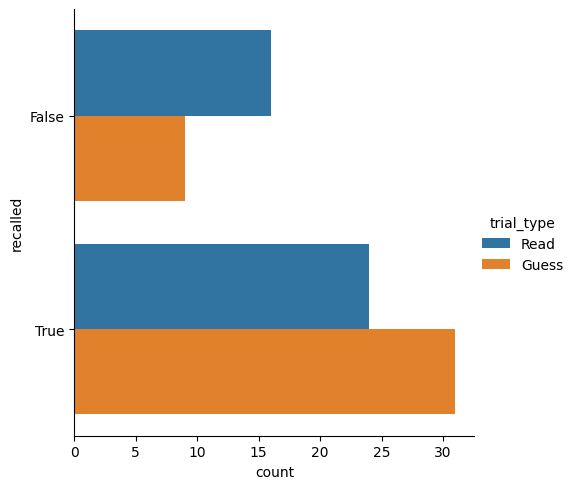

In [14]:
sns.catplot(data = recall, y = "recalled", kind="count", hue="trial_type")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


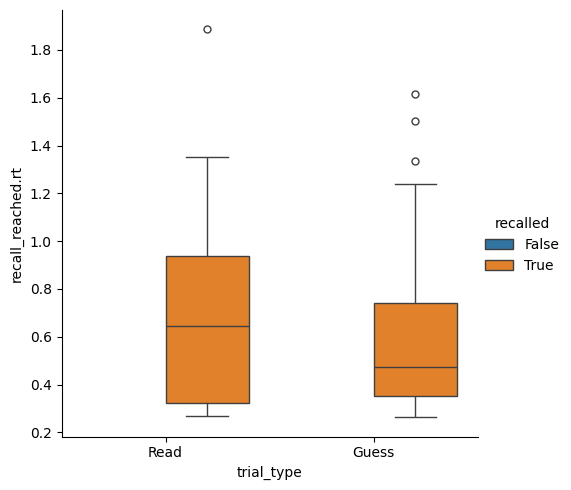

In [15]:
sns.catplot(data = recall, hue = "recalled", kind="box", x="trial_type", y = "recall_reached.rt")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


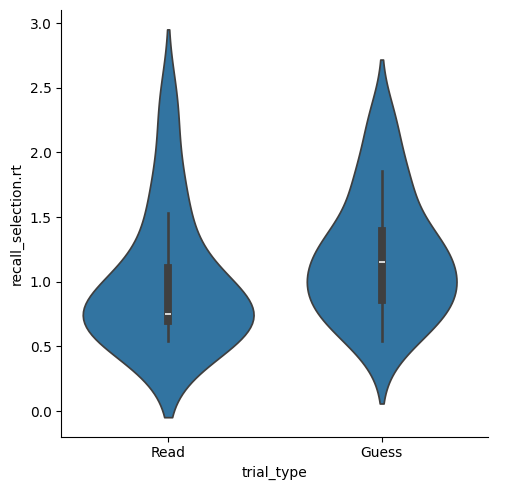

In [16]:
sns.catplot(data = recall, kind = "violin", x="trial_type", y = "recall_selection.rt")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


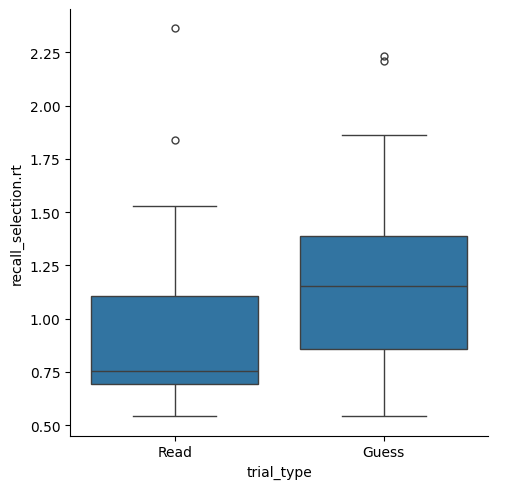

In [17]:
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", kind='box')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


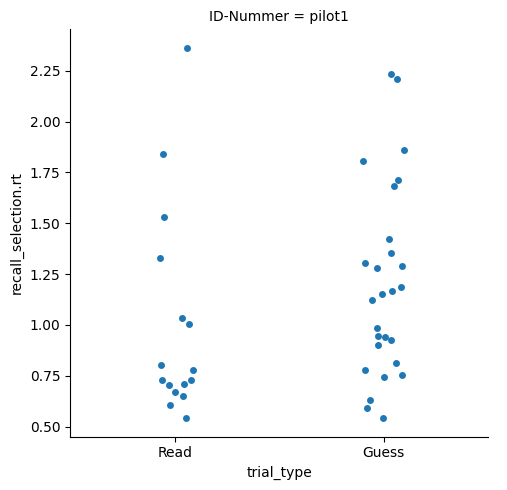

In [18]:
# Note: participant 879824 did not use the numeric keys, but the actual letter keys to select the last letter
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", row="ID-Nummer")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


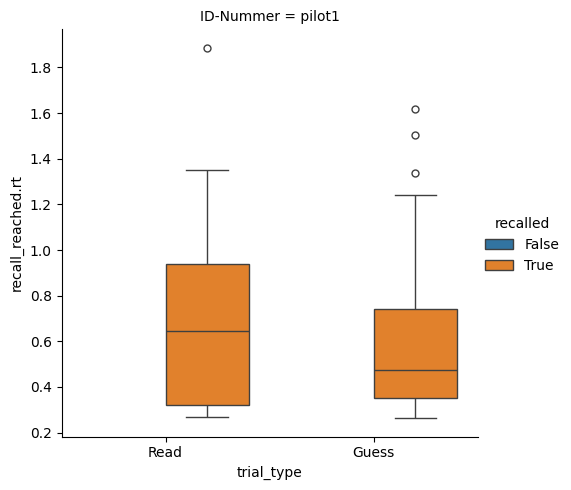

In [19]:
sns.catplot(data = recall, hue = "recalled", kind="box", x="trial_type", y = "recall_reached.rt", row="ID-Nummer")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


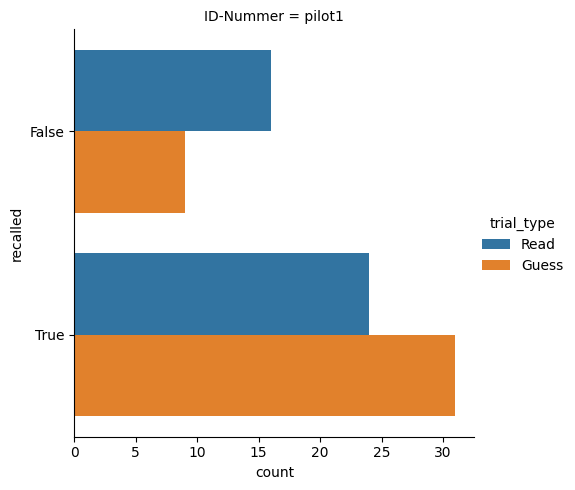

In [20]:
sns.catplot(data = recall, y = "recalled", kind="count", hue="trial_type", row='ID-Nummer')

In [21]:
recall_sum = pd.crosstab(index=recall['ID-Nummer'], columns = [recall['trial_type'], recall['recalled']], normalize=True)
recall_sum['Guess'][True]

ID-Nummer
pilot1    0.3875
Name: True, dtype: float64

In [22]:
scp.ttest_rel(recall_sum['Guess'][True], recall_sum['Read'][True])

C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


TtestResult(statistic=nan, pvalue=nan, df=0)